### `Binning (Discretization) and Binarization`


- This is a way of encoding *`numerical`* features.
- That is suppose we have a column named `Age` and it has values like `27`, `28`, `35` then how we can convert this *`numerical`* data to *`categorical`* data.
- There are two tecbniques to convert the *`numerical`* data to *`categorical`* data:
    - *`Discretization`*
    - *`Binarization`*

### *`Discretization / Binning`*

*`Discretization`* is the process of transforming *`continuous`* variables into *`discrete`* variables by creating a set of contiguous intervals that span the range of the variable's values. *`Discretization`* is also called *`Binning`* where `bin` is an alternative name for `interval`.


*`Discretization`* is used:
- To handle *`Outliers`*.
- To improve the value spread.




**Types of *`Discretization`***
- *`Unsupervised Binning`*
    - It is a class. This again has *`3`* techniques:
        - *`Equal Width Binning`*
            - This also known as *`Uniform Binning`*.
        - *`Equal Frequency Binning`*
            - This also known as *`Quantile Binning`*.
        - *`K means Binning`*
- *`Supervised Binning`*
    - This is also a class. Here only one technique is used called *`Decision Tree Binning`*.
    - This technique is rarely used, so not so important.
- *`Custom Binning`*




To implement this technique we need to use *`KBinsDiscretizer`* class of *`Sklearn`*. Here we have to mention *`3`* parameters:
- *`number of bins`*
- *`strategy`* : It has *`3`* values *`uniform`*, *`quantile`* and *`kmeans`*
- *`encoding`* : It has *`2`* options *`ordinal`* and *`one-hot`*

##### a. *`Equal Width/Uniform Binning`*

- Here we need to define how many *`bins`* we want.
- Here a formula gets used i.e. *`(max-min)/no. of bins`*
- This is called *`Equal Width`* because each *`bin`* has same range.
- Then once the *`bins`* are created then we need to see which value falls in which *`bin`*.
- After that we can calculate the *`frequency`* for each *`bin`* i.e. how many number of values in that *`bin`*.
- Then we can plot them in *`Histograms`*.
- **Advantages**
    - Here we can hadle some *`Outliers`*. Like the last data point comes inside the last *`bin`*, so it also get treated like other data points.
    - Here there is no change in the *`spread`* of the data.




##### b. *`Equal Frequency/Quantile Binning`*

- Here also we need to define how many *`bins`* we want.
- Here we work on same number of *`quantiles`* as many *`bins`* we created. i.e. if in a dataset we have a *`interval`* of *`10`* then each *`interval`* will contain *`10%`* of the total observations.
- Here the width of each *`interval`* will not be same.
- **Advantages**
    - This also works on *`outliers`*
    - This makes the *`spread`* of the values *`uniform`*.
    - This is the default technique when use the *`Scikit learn`* library.




##### c. *`K means Binning`*

- Here we use a *`clustering`* algoritm named *`K means`*.
- This technique is mainly used when the data is spread across different clusters, i.e. there is gap between two groups of data points.
- Here *`interval`* is called *`centroid`*.
- Here after defining the number of *`intervals`* we can create them anywhere in the dataset. Then we need to calculate the distance between each point and the *`centroid`*, then whichever point is nearer to whichever *`centroid`* that point becomes a part of that *`cluster`*.
- Then move each *`centroid`* towards the *`mean`* of all the data points in that *`cluster`*.
- Now again repeat step 1, i.e. again calculate the distance between each point and the *`centroid`*, and again decide which point belongs to which *`cluster`*. Again move each *`centroid`* towards the *`mean`* of all the data points in the newly assigned *`cluster`*.
- This process continues untill there is no difference between the last step and the current state.
- And the final values of each *`centroid`* is the value of each *`interval`*.

### *`Custom/Domain based Binning`*

- Sometimes we can create the *`Binning`* i.e. creating the *`bins`* by ourselves according to our needs.
- This is based on the *`Domain`* knowledge we have.
- This cannot be performed using *`Sklearn`* library, we need to write own logic in *`Pandas`*.

### *`Binarization`*

- It is a special case of *`Discretization`*.
- Whereas in *`Discretization`* we convert *`Continuous`* numerical values into *`Discrete`* values, in *`Binarization`* we we convert *`Continuous`* numerical values into *`Binary`* values i.e. *`0`* and *`1`*.
- It is mainly used in *`Image Processing`*.
- In *`sklearn`* have a class named *`Binarizer`* to do that.

### Example of *`Discretization`* or *`Binning`*

In [26]:
# importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# This is for the Discretization
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer

In [27]:
# Importing the dataset with some features only

df = pd.read_csv('datasets/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
# dropping all the missing values so it becomes a bit difficult

df.dropna(inplace=True)
df.shape

(714, 3)

#### Doing train test split

In [29]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((571, 2), (143, 2))

### Doing without using the *`Binning`*

In [31]:
# Creating a model using Decision Tree
clf = DecisionTreeClassifier()

# training the model
clf.fit(X_train, y_train)

# doing predictions
y_pred = clf.predict(X_test)

In [32]:
# Checking accuracy of the model

acc = accuracy_score(y_test, y_pred)
print (f"The accuracy of the model without Binning is: {(acc)*100:.2f}%")

The accuracy of the model without Binning is: 62.24%


In [33]:
# Now doing cross validatin for 10 times to see the accuracy

mean_accuracy = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10))
print(f"The accuracy of the model after cross validation is: {(mean_accuracy)*100:.2f}%")

The accuracy of the model after cross validation is: 63.17%


**Notes:**

- So the accuracy of the model without the *`Binning`* is around *`63%`*.

### Now doing the same with *`Binning`*

In [34]:
# Creating objects
# Here we are using 'quantile' strategy

kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [35]:
# Doing column transformer

trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [36]:
# Now transforming the train and test data

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [37]:
# Here we can see the transformers

trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [38]:
# To see inside the 1st transformer
# Here the 'bin_edges' shows the range

trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [39]:
# Creating a dataframe to compare between the initial dataframe and the transformed dataframe

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

output.sample(5)

,age,age_trf,fare,fare_trf
167,45.0,12.0,27.9000,10.0
302,19.0,3.0,0.0000,0.0
493,71.0,14.0,49.5042,11.0
215,31.0,8.0,113.2750,14.0
762,20.0,3.0,7.2292,0.0


In [40]:
# Here we can see along with the range

output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
592,47.0,13.0,7.2500,1.0,"(42.0, 47.0]","(0.0, 7.25]"
489,9.0,1.0,15.9000,7.0,"(6.0, 16.0]","(14.454, 18.75]"
146,27.0,6.0,7.7958,2.0,"(25.0, 28.0]","(7.775, 7.896]"
842,30.0,8.0,31.0000,10.0,"(28.0, 30.0]","(26.55, 31.275]"
397,46.0,12.0,26.0000,9.0,"(42.0, 47.0]","(18.75, 26.0]"


In [41]:
# Now again creating model

clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [42]:
# Again checking accuracy of the model

acc2 = accuracy_score(y_test, y_pred2)
print (f"The accuracy of the model without Binning is: {(acc)*100:.2f}%")

The accuracy of the model without Binning is: 62.24%


In [43]:
# Now doing cross validatin for 10 times to see the accuracy

X_trf = trf.fit_transform(X)
mean_accuracy = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10))
print(f"The accuracy of the model after cross validation is: {(mean_accuracy)*100:.2f}%")

The accuracy of the model after cross validation is: 63.31%


In [44]:
# Here is a function where we have to pass number of bins and strategy
# This will return the accuracy and also show the graph

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    acc = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))
    print(f"The accuracy is: {(acc)*100:.2f}%")
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()

The accuracy is: 63.17%


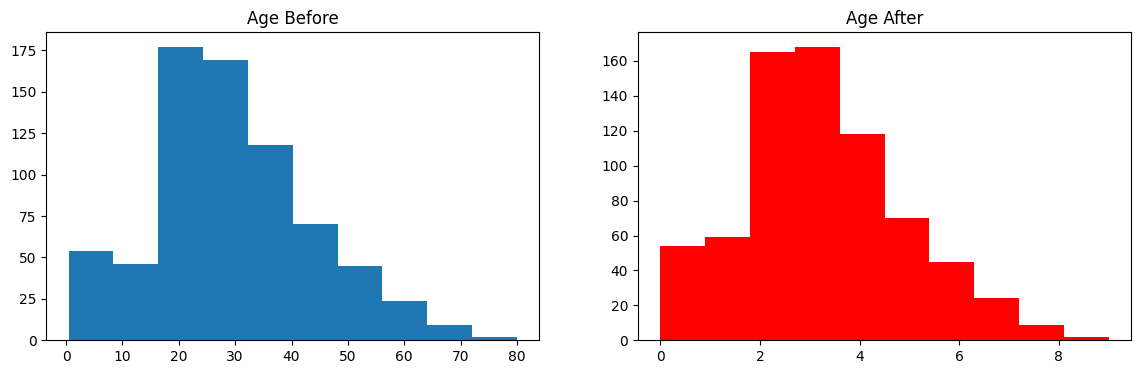

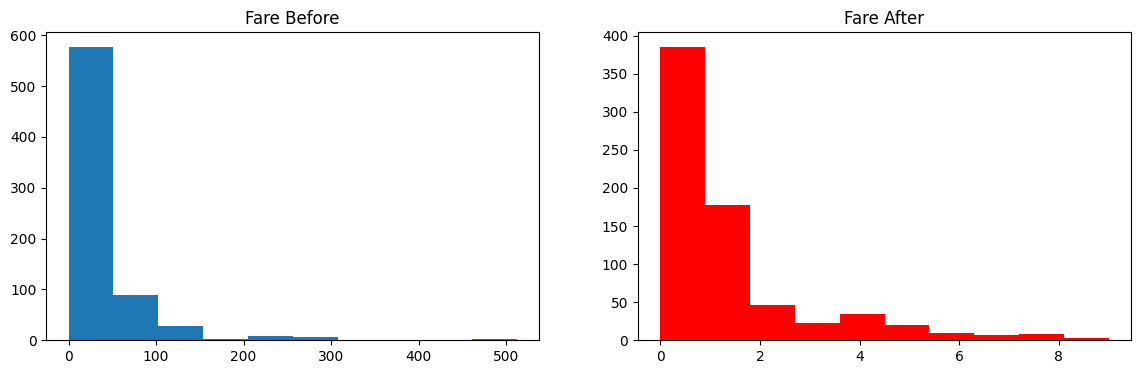

In [45]:
# Here we use 10 bins and 'kmeans' strategy

discretize(10, 'kmeans')

The accuracy is: 63.17%


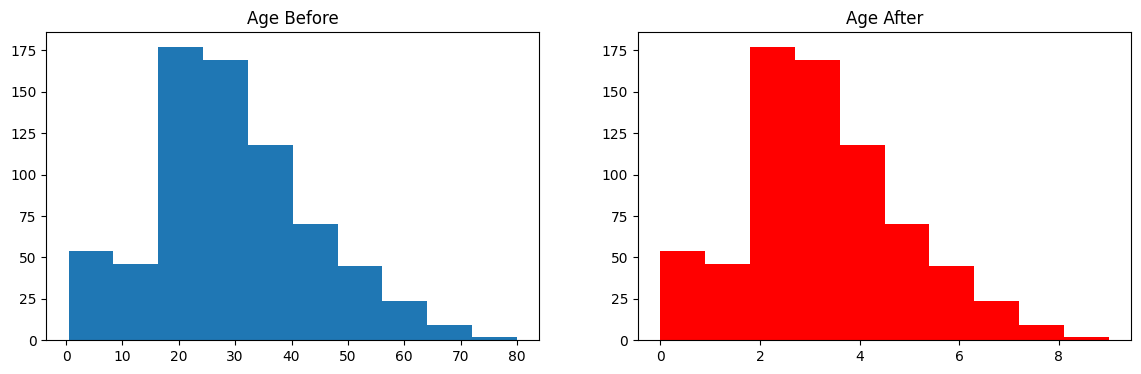

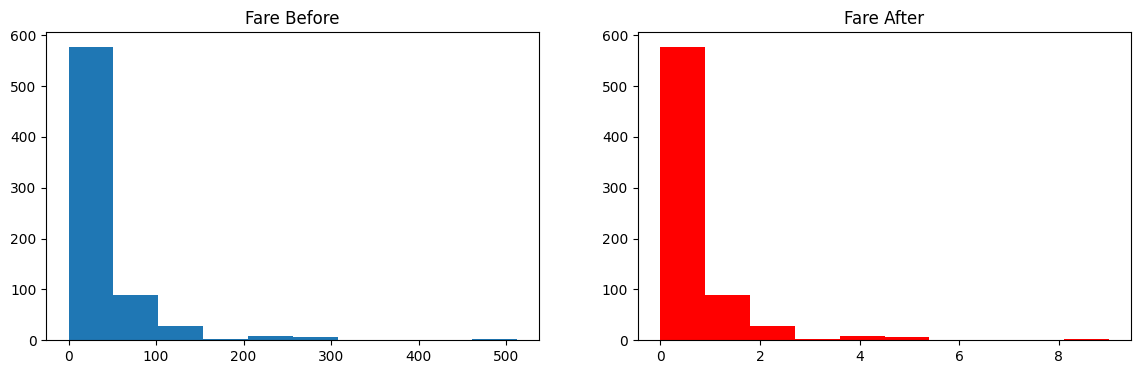

In [46]:
# Here we use 10 bins and 'uniform' strategy

discretize(10, 'uniform')

### Example of *`Binarization`*

In [55]:
# Here again taking the dataframe with required columns only
# also removing all the missing values

df = pd.read_csv('datasets/train.csv', usecols=['Age','Fare','SibSp','Parch','Survived'])
df.dropna(inplace=True)
df.shape

(714, 5)

In [56]:
# Checking the dataset

df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [57]:
# Now we will add the columns 'SibSp' and 'Parch' and named it as 'Family'
# Then we drop both the columns as we don't need them anymore

df['Family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [58]:
# Now creating independent and dependent variables

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [59]:
# Now doing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((571, 3), (143, 3))

In [60]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


### Training model and see accuracy without *`Binarization`*

In [61]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print(f"The accuracy of the model without Binarization applied is: {(acc)*100:.2f}%")

The accuracy of the model without Binarization applied is: 64.34%


In [62]:
# Now doing cross validation to check the result

mean_accuracy = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10))
print(f"The accuracy of the model without Binarization applied after cross validation is: {(mean_accuracy)*100:.2f}%")

The accuracy of the model without Binarization applied after cross validation is: 64.43%


- **Now to apply the concept of *`Binarization`* we wanted to see whether a passenger is traveling with family or not?**
- If the value of column *`Family`* is *`0`* that means he/she is travelling alone else they are travelling with family.
- So here we will convert the column *`Family`* to a new column *`Travelling_alone`*

In [63]:
# importing the library

from sklearn.preprocessing import Binarizer

In [64]:
# Creating the transformation
# Here by default the 'threshold' parameter of 'Binarizer' is set to 0
# We have to change the parameter 'copy' to 'False'

trf = ColumnTransformer([
    ('bin', Binarizer(copy=False), ['Family'])
    ], remainder="passthrough")

In [65]:
# Now applying the transformation

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [66]:
# Creating dataframe to see the transformed column

pd.DataFrame(X_train_trf, columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


### Training model and see accuracy with *`Binarization`* applied

In [67]:
clf = DecisionTreeClassifier()

clf.fit(X_train_trf, y_train)

y_pred2 = clf.predict(X_test_trf)

acc2 = accuracy_score(y_test, y_pred2)

print(f"The accuracy of the model without Binarization applied is: {(acc2)*100:.2f}%")

The accuracy of the model without Binarization applied is: 61.54%


In [68]:
# Now again doing cross validation to check the result

X_trf = trf.fit_transform(X)

mean_accuracy2 = np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy'))

print(f"The accuracy of the model without Binarization applied after cross validation is: {(mean_accuracy2)*100:.2f}%")

The accuracy of the model without Binarization applied after cross validation is: 63.46%
